<a href="https://colab.research.google.com/github/jixaw31/Image-Classification-model-with-Pytorch-on-FaishonMNIST-dataset/blob/main/image_classification_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import tensorflow as tf
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [2]:

os.chdir('/content/drive/MyDrive')


os.listdir('/content/drive/MyDrive/happy_sad_data')


['sad', 'happy']

In [3]:
path_happy = os.listdir(os.path.join('/content/drive/MyDrive/happy_sad_data', 'happy'))

path_sad = os.listdir(os.path.join('/content/drive/MyDrive/happy_sad_data', 'sad'))

image_classes = os.listdir('/content/drive/MyDrive/happy_sad_data')

len(os.listdir(os.path.join('/content/drive/MyDrive/happy_sad_data', 'happy')))



91

In [4]:
happy_sad_path = '/content/drive/MyDrive/happy_sad_data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
for image_class in image_classes:
    print(image_class)
    for image in os.listdir(os.path.join(happy_sad_path, f'{image_class}')):
        image_path = os.path.join(happy_sad_path, f'{image_class}', image)
        try:
            img = cv2.imread(image_path, cv2.IMREAD_COLOR)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f"format {format(image_path)} not in exts list!")
                os.remove(image_path)
        except:
            print('image not found')

sad
happy


In [5]:
imghdr.what('/content/drive/MyDrive/happy_sad_data/happy/05-12-21-happy-people.jpg') # for reference

'jpeg'

In [126]:
# tf.keras.utils.image_dataset_from_directory??

In [6]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/happy_sad_data', batch_size=16) #perfect
# data = torchvision.datasets.ImageFolder(root= '/content/drive/MyDrive/happy_sad_data',
#                                  transform = None, #
#                                  target_transform = None,
#                                  loader = None,
#                                  is_valid_file = None)
# torchvision.datasets.ImageFolder(root: str,
# transform: ~typing.Optional[~typing.Callable] = None, target_transform: ~typing.Optional[~typing.Callable] = None,
# loader: ~typing.Callable[[str], ~typing.Any] = <function default_loader>,
# is_valid_file: ~typing.Optional[~typing.Callable[[str], bool]] = None,
# allow_empty: bool = False)

Found 179 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[0].shape

(16, 256, 256, 3)

In [130]:
images, labels = next(iter(data))
batches = next(iter(data))
images_int = tf.cast(images, dtype=np.uint8)
tf.cast() # turns dtype
batches[0].shape

TensorShape([16, 256, 256, 3])

In [129]:
# images_int[0][0, 0 ,0]
# images.shape

TensorShape([16, 256, 256, 3])

In [131]:
image_1 = images[0]
image_1_uint8 = tf.cast(image_1, dtype=np.uint8)
image_1_uint8[0, 0, 0]

<tf.Tensor: shape=(), dtype=uint8, numpy=0>

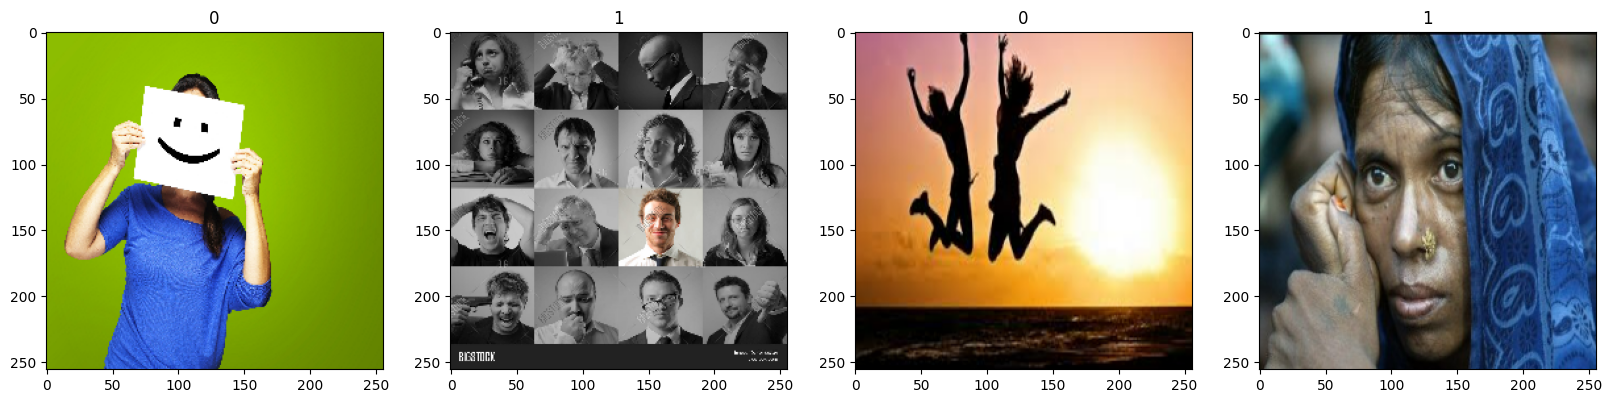

In [11]:

label_names = {0:'happy', 1:'sad'}
tf.reduce_max(image_1)
image_1_int = tf.cast(image_1, dtype=np.uint8)

# plt.figure(figsize=(40, 10))
# plt.subplot(141);plt.imshow(images_int[0]);plt.title(label_names[int(labels[0])])
# plt.subplot(142);plt.imshow(images_int[2]);plt.title(label_names[int(labels[2])])
# plt.subplot(143);plt.imshow(images_int[3]);plt.title(label_names[int(labels[3])])
# plt.subplot(144);plt.imshow(images_int[4]);plt.title(label_names[int(labels[4])])

#or

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])





In [12]:
"""Lambda function quick tutorial"""
# def my_map(my_func, a_list: list): #
#     result = []
#     for item in a_list:
#         new_item = my_func(item)
#         result.append(new_item)
#     return result
# nums = [1, 2, 3, 4]
# my_map(lambda x:x**3, nums)

In [14]:
# data = data.map(lambda image, label: (image/255, label)) x = image, y = label
data = data.map(lambda x, y: (x/255, y))

images_batch, labels_batch = next(iter(data))


Text(0.5, 1.0, 'happy')

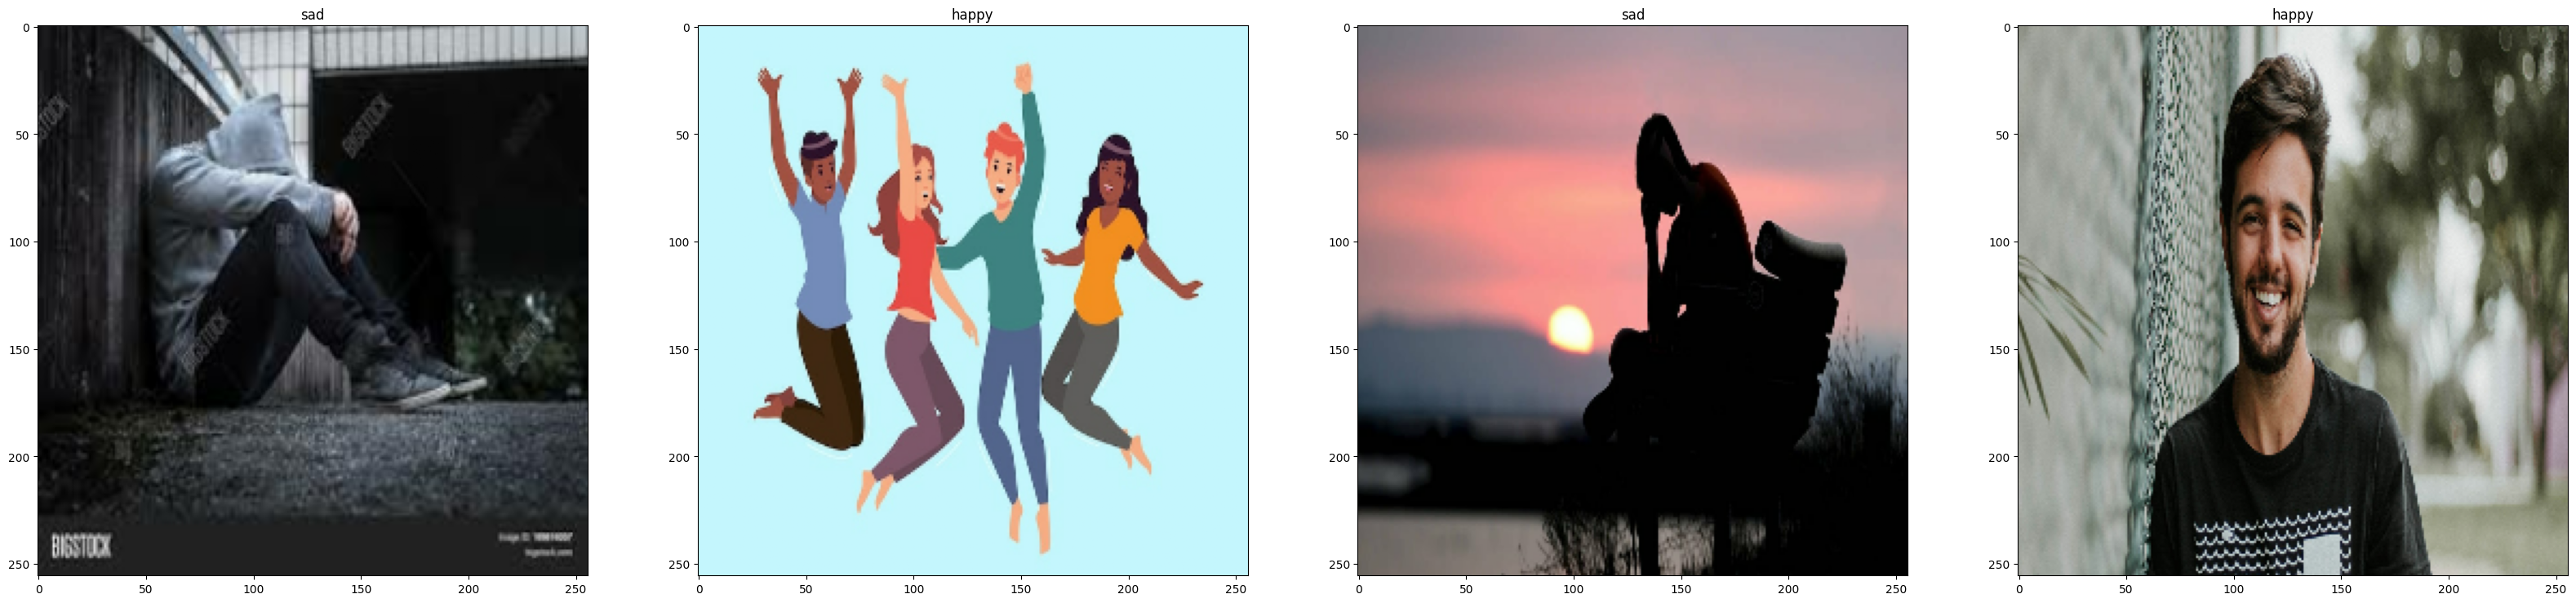

In [15]:
plt.figure(figsize=(40, 10))
plt.subplot(141);plt.imshow(images_batch[0]);plt.title(label_names[int(labels_batch[0])])
plt.subplot(142);plt.imshow(images_batch[2]);plt.title(label_names[int(labels_batch[2])])
plt.subplot(143);plt.imshow(images_batch[3]);plt.title(label_names[int(labels_batch[3])])
plt.subplot(144);plt.imshow(images_batch[4]);plt.title(label_names[int(labels_batch[4])])


In [16]:
images_batch[4].shape

TensorShape([256, 256, 3])

In [17]:
train_size = int(len(data) * 0.7)
validate_size = int(len(data) * 0.1)
test_size = int(len(data) * 0.2)
train_size , validate_size, test_size

(8, 1, 2)

In [18]:
train = data.take(int(len(data) * 0.7))
val = data.take(int(len(data) * 0.1))
test = data.take(int(len(data) * 0.2))

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout



In [20]:
model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [23]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
print(os.getcwd())

/content/drive/MyDrive


In [27]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks= [tensorboard_callback])

Epoch 1/5
8/8 [==============================] - 14s 1s/step - loss: 0.8643 - accuracy: 0.5625 - val_loss: 0.7036 - val_accuracy: 0.5625
Epoch 2/5
8/8 [==============================] - 12s 1s/step - loss: 0.6962 - accuracy: 0.6172 - val_loss: 0.6430 - val_accuracy: 0.7500
Epoch 3/5
8/8 [==============================] - 12s 1s/step - loss: 0.5564 - accuracy: 0.7734 - val_loss: 0.5335 - val_accuracy: 0.6875
Epoch 4/5
8/8 [==============================] - 13s 1s/step - loss: 0.3998 - accuracy: 0.8203 - val_loss: 0.3121 - val_accuracy: 0.8750
Epoch 5/5
8/8 [==============================] - 20s 2s/step - loss: 0.2760 - accuracy: 0.8750 - val_loss: 0.1153 - val_accuracy: 1.0000


In [52]:
one_to_6 = np.arange(1,7)
one_to_6

array([1, 2, 3, 4, 5])

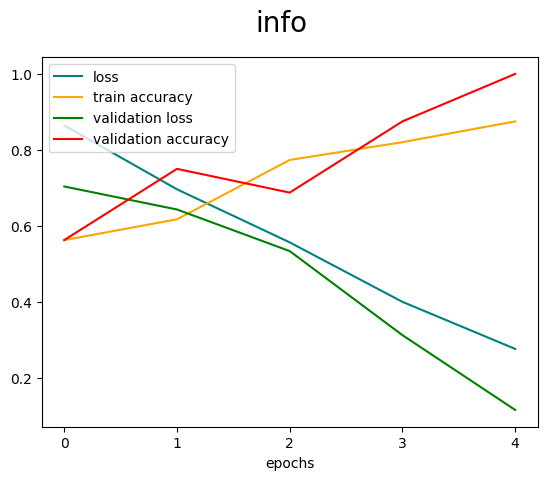

[0.5625, 0.75, 0.6875, 0.875, 1.0]


In [138]:
one_to_5 = np.arange(0, 5)

# hist.history['val_accuracy'].pop()

fig = plt.figure()

plt.xlabel('epochs')
plt.xticks(one_to_5)
plt.plot( hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['accuracy'], color='orange', label='train accuracy')
plt.plot(hist.history['val_loss'], color='green', label='validation loss')
plt.plot(hist.history['val_accuracy'], color='red', label='validation accuracy')
fig.suptitle('info', fontsize=20)
plt.legend(loc = 'upper left')
plt.show()



In [137]:
# hist.history['val_accuracy'].pop()
hist.history['val_accuracy']

[0.5625, 0.75, 0.6875, 0.875, 1.0]

In [37]:
hist.history['loss']
len(hist.history['loss'])
len(hist.history['val loss'])

5

In [68]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [84]:
precision = Precision()
recall = Recall()
binaryAccuracy = BinaryAccuracy()
for test_batch in test.as_numpy_iterator():
    X, y = test_batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    binaryAccuracy.update_state(y, yhat)

print(f"{precision.result}{recall.result}{binaryAccuracy.result}")

1/1 [==============================] - 0s 416ms/step
<bound method Metric.__new__.<locals>.result_fn of <keras.src.metrics.confusion_metrics.Precision object at 0x7daf77a12e90>><bound method Metric.__new__.<locals>.result_fn of <keras.src.metrics.confusion_metrics.Recall object at 0x7daf6825df60>><bound method Metric.__new__.<locals>.result_fn of <keras.src.metrics.accuracy_metrics.BinaryAccuracy object at 0x7daf6825fdc0>>


In [88]:
print(f"precision:{precision.result()} | recall:{recall.result()} | binaryAccuracy:{binaryAccuracy.result()} ")

precision:0.875 | recall:1.0 | binaryAccuracy:0.9375 


1/1 [==============================] - 0s 34ms/step


(array([[0.45261192]], dtype=float32),
 array([[0.9716089]], dtype=float32),
 array([[0.6416404]], dtype=float32))

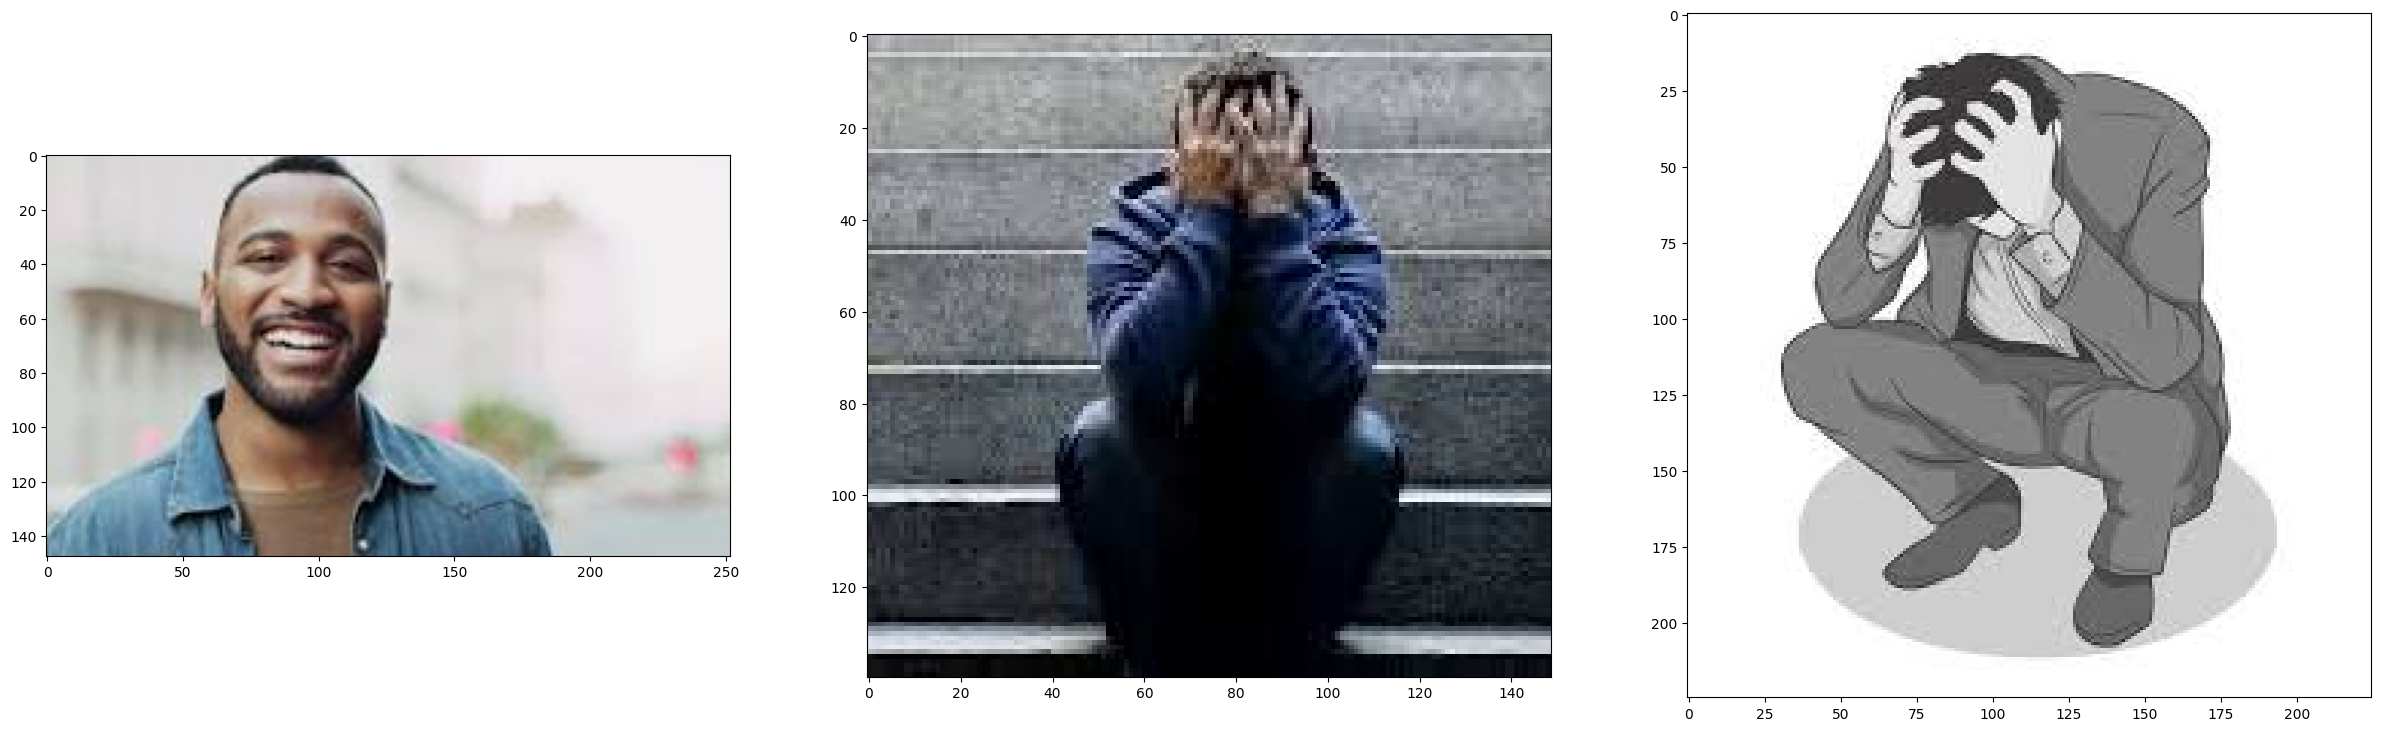

In [116]:

dude = cv2.imread('/content/drive/MyDrive/happy_dude.jpg', cv2.IMREAD_COLOR)
dude_1 = cv2.imread('/content/drive/MyDrive/sad dude.jpg', cv2.IMREAD_COLOR)
dude_2 = cv2.imread('/content/drive/MyDrive/happy_hands_up.jpg', cv2.IMREAD_COLOR)
dude_3 = cv2.imread('/content/drive/MyDrive/sadperson.jpg', cv2.IMREAD_COLOR)
dude, dude_1 = cv2.cvtColor(dude, cv2.COLOR_BGR2RGB), cv2.cvtColor(dude_1, cv2.COLOR_BGR2RGB)
dude_2 = cv2.cvtColor(dude_2, cv2.COLOR_BGR2RGB)
dude_3 = cv2.cvtColor(dude_3, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(30, 10))
plt.subplot(131);plt.imshow(dude)
plt.subplot(132);plt.imshow(dude_1)
plt.subplot(133);plt.imshow(dude_3)

dude_scaled = tf.image.resize(dude, size=(256, 256))
dude_1_scaled = tf.image.resize(dude_1, size=(256, 256))
dude_2_scaled = tf.image.resize(dude_2, size=(256, 256))
dude_3_scaled = tf.image.resize(dude_3, size=(256, 256))


dude_scaled_expanded = tf.expand_dims(dude_scaled/255, axis=0)
dude_1_scaled_expanded = tf.expand_dims(dude_1_scaled/255, axis=0)
dude_2_scaled_expanded = tf.expand_dims(dude_2_scaled/255, axis=0)
dude_3_scaled_expanded = tf.expand_dims(dude_3_scaled/255, axis=0)

result_dude_scaled = model.predict(dude_scaled_expanded)
result_dude_1_scaled = model.predict(dude_1_scaled_expanded)
result_dude_2_scaled = model.predict(dude_2_scaled_expanded)
result_dude_3_scaled = model.predict(dude_3_scaled_expanded)


result_dude_scaled, result_dude_1_scaled, result_dude_3_scaled

In [114]:
np.round(result_dude_scaled)

array([[0.]], dtype=float32)

In [119]:
from tensorflow.keras.models import load_model



In [122]:
model.save(os.path.join('/content/drive/MyDrive/my models', 'sad_happy_classifier.keras'))



In [123]:


model_0 = load_model(os.path.join('/content/drive/MyDrive/my models', 'sad_happy_classifier.keras'))





In [125]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0